## Portfolio I - Análise de Dados de Mercados Financeiros

Alice Mangara & Vasco Santos @ DEI

20 stocks for each industry group: Technology, Energy, Retail.

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
import vectorbt as vbt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import openpyxl

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [2]:
# Initial variables
start_date = '2022-01-01'
end_date = '2023-12-31'
period = '2y'
interval = '1d' # which the better value for interval? 1d or 1h?

### Possible pairs by industry group

In [3]:
# Technology Stocks
technology_stocks = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META",
    "NVDA", "TSLA", "CRM", "ADBE", "IBM",
    "INTC", "CSCO", "ORCL", "QCOM", "PYPL",
    "NFLX", "AVGO", "AMD", "ZM", "SHOP"
]

# Energy Stocks
energy_stocks = [
    "XOM", "CVX", "RDS-A", "BP", "TTE",
    "COP", "OXY", "SLB", "EOG", "KMI",
    "PSX", "VLO", "EPD", "HAL", "E",
    "CNQ", "DVN", "APA", "BKR", "WMB"
]

# Retail Stocks
retail_stocks = [
    "WMT", "AMZN", "HD", "COST", "BABA",
    "TGT", "LOW", "TJX", "NKE", "MCD",
    "SBUX", "KR", "CVS", "WBA", "DG",
    "DLTR", "ROST", "BBY", "GPS", "YUM"
]

### TESCO | SAINSBURY

In [4]:
# Fetch historical data from Yahoo Finance
stock_TSCO = 'TSCO.L'
stock_SBRY = 'SBRY.L'

data_TSCO = yf.download(stock_TSCO, period=period, interval=interval)['Close']
data_SBRY = yf.download(stock_SBRY, period=period, interval=interval)['Close']

# Combine the data into a single DataFrame
prices_TSCO_SBRY = pd.DataFrame({stock_TSCO: data_TSCO, stock_SBRY: data_SBRY})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Cointegration

In [5]:
# Define assets and download data
asset_TSCO = 'TSCO.L'
asset_SBRY = 'SBRY.L'

tickers_TSCO_SBRY = [asset_TSCO, asset_SBRY]

assets_TSCO_SBRY = pd.DataFrame()

for i in tickers_TSCO_SBRY:

  df = yf.download(i, period=period, interval=interval)['Close']
  df.rename(i, inplace=True)
  assets_TSCO_SBRY = pd.concat([assets_TSCO_SBRY,df], axis=1)
  assets_TSCO_SBRY.index.name='Date'

assets_TSCO_SBRY

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,TSCO.L,SBRY.L
Date,,
2022-04-26 00:00:00,270.200012,240.199997
2022-04-27 00:00:00,273.600006,239.000000
2022-04-28 00:00:00,272.299988,228.699997
2022-04-29 00:00:00,272.000000,233.300003
2022-05-03 00:00:00,276.700012,240.899994
...,...,...
2024-04-22 00:00:00,291.100006,269.000000
2024-04-23 00:00:00,293.000000,269.000000
2024-04-24 00:00:00,291.399994,268.000000


In [6]:
# Plot prices in line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=assets_TSCO_SBRY[asset_TSCO], name=asset_TSCO))
fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=assets_TSCO_SBRY[asset_SBRY], name=asset_SBRY))
fig.update_layout(title_text='Prices (USD)', template='simple_white')
fig.show()

In [7]:
# # Normalizing the data
# normalizing_value = assets_TSCO_SBRY[asset_SBRY][0]/assets_TSCO_SBRY[asset_TSCO][0]
# print(normalizing_value)

# assets_TSCO_SBRY['TSCO_NORM'] = assets_TSCO_SBRY[asset_TSCO].multiply(normalizing_value).round(4)

# # Normalize prices
# norm_prices_TSCO_SBRY = assets_TSCO_SBRY / assets_TSCO_SBRY.iloc[0]
# print(norm_prices_TSCO_SBRY)

# # Plot normalized prices in line chart
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=norm_prices_TSCO_SBRY.index, y=norm_prices_TSCO_SBRY[stock_TSCO], name=stock_TSCO))
# fig.add_trace(go.Scatter(x=norm_prices_TSCO_SBRY.index, y=norm_prices_TSCO_SBRY[stock_SBRY], name=stock_SBRY))
# fig.update_layout(title_text='Normalized Prices', template='simple_white')
# fig.show()

# # Plot normalized prices in line chart
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=assets_TSCO_SBRY['TSCO_NORM'], name='TSCO_NORM'))
# fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=assets_TSCO_SBRY[stock_SBRY], name=stock_SBRY))
# fig.update_layout(title_text='Normalized Prices', template='simple_white')
# fig.show()

In [8]:
# # Plot prices in scatter chart
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=assets_TSCO_SBRY[asset_TSCO], y=assets_TSCO_SBRY[asset_SBRY], mode='markers'))
# fig.update_layout(title_text='TSCO Prices x SBRY Prices', template='simple_white')
# fig.show()

In [9]:
# Plot returns in scatter chart
returns_TSCO_SBRY = assets_TSCO_SBRY.pct_change()

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=returns_TSCO_SBRY[asset_TSCO], y=returns_TSCO_SBRY[asset_SBRY], mode='markers'))
# fig.update_layout(title_text='Retornos', template='simple_white')
# fig.show()

In [10]:
# Run augmented engle granger test and print p-value
assets_TSCO_SBRY.dropna(inplace=True)
score, pvalue, _ = coint(assets_TSCO_SBRY[asset_TSCO], assets_TSCO_SBRY[asset_SBRY])
if pvalue < 0.05:
    print("Cointegration - Augmented Engle-Granger Test p-value:", round(pvalue, 4))
else:
    print("No Cointegration - Augmented Engle-Granger Test p-value:", round(pvalue, 4))

No Cointegration - Augmented Engle-Granger Test p-value: 0.7151


This test result is that there is a ~75% chance that the series are not cointegrated

In [11]:
# Run linear regression and calculate regression beta

X1_TSCO = assets_TSCO_SBRY[asset_TSCO]
X2_SBRY = assets_TSCO_SBRY[asset_SBRY]

X1_TSCO = sm.add_constant(X1_TSCO) # adding a constant
regression_TSCO_SBRY = sm.OLS(X2_SBRY, X1_TSCO).fit() # running the regression
X1_TSCO = X1_TSCO[asset_TSCO] # removing the constant
beta_1 = regression_TSCO_SBRY.params[asset_TSCO] # getting the beta coefficient
print("Beta:", round(beta_1, 4))

regression_TSCO_SBRY.params

Beta: 0.9806


const    -6.256171
TSCO.L    0.980580
dtype: float64

In [12]:
assets_figure = assets_TSCO_SBRY.copy()
assets_figure['regression'] = regression_TSCO_SBRY.params[0] + regression_TSCO_SBRY.params[1]*assets_figure[asset_TSCO]
assets_figure

,TSCO.L,SBRY.L,regression
Date,,,
2022-04-26 00:00:00,270.200012,240.199997,258.696429
2022-04-27 00:00:00,273.600006,239.000000,262.030393
2022-04-28 00:00:00,272.299988,228.699997,260.755622
2022-04-29 00:00:00,272.000000,233.300003,260.461460
2022-05-03 00:00:00,276.700012,240.899994,265.070196
...,...,...,...
2024-04-22 00:00:00,291.100006,269.000000,279.190535
2024-04-23 00:00:00,293.000000,269.000000,281.053630
2024-04-24 00:00:00,291.399994,268.000000,279.484697


In [13]:
# # Plot prices with regression line
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=assets_figure[asset_TSCO], y=assets_figure[asset_SBRY], mode='markers', name='TSCO x SBRY'))
# fig.add_trace(go.Scatter(x=assets_figure[asset_TSCO], y=assets_figure['regression'], mode='lines', name='Regression'))
# fig.update_layout(title_text='TSCO Prices x SBRY Prices (USD)', template='simple_white')
# fig.show()

In [14]:
# Calculate regression residual
spread_TSCO_SBRY = X2_SBRY - (beta_1 * X1_TSCO)

# Plot residuals in line chart as a time series
fig = go.Figure()
fig.add_trace(go.Scatter(x=spread_TSCO_SBRY.index, y=spread_TSCO_SBRY, name='Spread'))
fig.update_layout(title_text='Spread', template='simple_white')
fig.show()

In [15]:
# Run augmented dickey fuller test and print p-value - Stationarity test
test = adfuller(spread_TSCO_SBRY)
if test[1] < 0.05:
    print("Spread Stationary - Augmented Dickey-Fuller Test p-value:", round(test[1], 4))
else:
    print("Spread Non-Stationary - Augmented Dickey-Fuller Test p-value:", round(test[1], 4))

Spread Non-Stationary - Augmented Dickey-Fuller Test p-value: 0.3744


The 0.35 p-value do not fall within our confidence level of 5%. This doens't allows us to reject the null-hypothesis and consider the residuals time series stationary.

So, the residuals time series is not stationary.

In [16]:
# Calculate z-score of residuals and plot in line chart
z_score_TSCO_SBRY = (spread_TSCO_SBRY - spread_TSCO_SBRY.mean())/np.std(spread_TSCO_SBRY)

fig = go.Figure()
fig.add_trace(go.Scatter(x=z_score_TSCO_SBRY.index, y=z_score_TSCO_SBRY, name='Z_Score'))
fig.update_layout(title_text='Residuals Z-Score', template='simple_white')
fig.show()

In [84]:
# Plot prices with z-scores

new_tsco = assets_TSCO_SBRY[asset_TSCO].copy() * beta_1

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=assets_TSCO_SBRY[asset_TSCO], name=asset_TSCO))
# fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=assets_TSCO_SBRY[asset_SBRY], name=asset_SBRY))
# fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=new_tsco, name='New TSCO'))
# fig.update_layout(title_text='Prices with Z-Scores', template='simple_white')
# fig.show()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=new_tsco, name=('beta * ' + asset_TSCO)), row=1, col=1)
fig.add_trace(go.Scatter(x=assets_TSCO_SBRY.index, y=assets_TSCO_SBRY[asset_SBRY], name=asset_SBRY), row=1, col=1)
fig.add_trace(go.Scatter(x=z_score_TSCO_SBRY.index, y=z_score_TSCO_SBRY, name='Z_Score'), row=2, col=1)
fig.update_layout(title_text='Análise Z_Score', template='simple_white', height=850, width=1000)
fig.show()

In [18]:
# Download open prices for assets
assets_open_TSCO_SBRY = pd.DataFrame()

for i in tickers_TSCO_SBRY:

  df2 = yf.download(i, period=period)['Open']
  df2.rename(i, inplace=True)
  assets_open_TSCO_SBRY = pd.concat([assets_open_TSCO_SBRY, df2], axis=1)
  assets_open_TSCO_SBRY.index.name='Date'

assets_open_TSCO_SBRY

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


,TSCO.L,SBRY.L
Date,,
2022-04-26 00:00:00,269.799988,242.199997
2022-04-27 00:00:00,271.399994,240.699997
2022-04-28 00:00:00,275.100006,233.800003
2022-04-29 00:00:00,271.299988,227.000000
2022-05-03 00:00:00,270.000000,232.899994
...,...,...
2024-04-22 00:00:00,285.299988,265.200012
2024-04-23 00:00:00,293.000000,270.200012
2024-04-24 00:00:00,292.799988,267.399994


In [19]:
# Define Backtest Parameters

cash = 100000
fees = 0.001

percentage_order_1 = 1
percentage_order_2 = 1

upper_open_threshold = 2
lower_open_threshold = -2

upper_close_threshold = 1
lower_close_threshold = -1

In [20]:
# Define the trading strategy

def pairs_trading_strategy(z_scores):
    position = np.zeros_like(z_scores)

    for i in range(len(z_scores)):
        if z_scores[i] > 2:
            position[i] = -1  # Enter short position
        elif z_scores[i] < -2:
            position[i] = 1  # Enter long position
        elif abs(z_scores[i]) == 0:
            position[i] = 0  # Zero position
        else:
            position[i] = position[i-1]

    return position

# Run the strategy
position_TSCO_SBRY = pairs_trading_strategy(z_score_TSCO_SBRY.values)

# Create DataFrame for results
result_TSCO_SBRY = pd.DataFrame({
    'z_scores': z_score_TSCO_SBRY,
    'position': position_TSCO_SBRY,
}, index=z_score_TSCO_SBRY.index)

result_TSCO_SBRY[asset_TSCO] = -result_TSCO_SBRY['position']
result_TSCO_SBRY[asset_SBRY] = result_TSCO_SBRY['position']
result_TSCO_SBRY

,z_scores,position,TSCO.L,SBRY.L
Date,,,,
2022-04-26 00:00:00,-0.872472,0.0,-0.0,0.0
2022-04-27 00:00:00,-1.086338,0.0,-0.0,0.0
2022-04-28 00:00:00,-1.512056,0.0,-0.0,0.0
2022-04-29 00:00:00,-1.281199,0.0,-0.0,0.0
2022-05-03 00:00:00,-1.140103,0.0,-0.0,0.0
...,...,...,...,...
2024-04-22 00:00:00,-0.480685,0.0,-0.0,0.0
2024-04-23 00:00:00,-0.568567,0.0,-0.0,0.0
2024-04-24 00:00:00,-0.541730,0.0,-0.0,0.0


In [21]:
# Plot z-score along with assets positions
fig = go.Figure()
fig.add_trace(go.Scatter(x=result_TSCO_SBRY.index, y=result_TSCO_SBRY['z_scores'], name='Z-Score'))
fig.add_trace(go.Scatter(x=result_TSCO_SBRY.index, y=result_TSCO_SBRY[asset_TSCO], name=f'Position {asset_TSCO}'))
fig.add_trace(go.Scatter(x=result_TSCO_SBRY.index, y=result_TSCO_SBRY[asset_SBRY], name=f'Position {asset_SBRY}'))
fig.update_layout(title_text='Backtest Positions', template='simple_white')
fig.show()

In [22]:
#Create trading signals to open and close positions

vbt_short_signal = ((result_TSCO_SBRY['position'] == -1) & (result_TSCO_SBRY['position'].shift(1) != -1))
vbt_long_signal = ((result_TSCO_SBRY['position'] == 1) & (result_TSCO_SBRY['position'].shift(1) != 1))

vbt_close_short = ((result_TSCO_SBRY['position'] == 0) & (result_TSCO_SBRY['position'].shift(1) == -1))
vbt_close_long = ((result_TSCO_SBRY['position'] == 0) & (result_TSCO_SBRY['position'].shift(1) == 1))

In [23]:
# Create trades dataframe according to the signals

tickers_column = pd.Index([asset_TSCO, asset_SBRY], name='tickers')
vbt_t_TSCO_SBRY = pd.DataFrame(index=assets_TSCO_SBRY.index, columns=tickers_column)
vbt_t_TSCO_SBRY[asset_TSCO] = np.nan
vbt_t_TSCO_SBRY[asset_SBRY] = np.nan

# Open position trades
vbt_t_TSCO_SBRY.loc[vbt_short_signal, asset_TSCO] = percentage_order_1
vbt_t_TSCO_SBRY.loc[vbt_long_signal, asset_TSCO] = -percentage_order_1
vbt_t_TSCO_SBRY.loc[vbt_short_signal, asset_SBRY] = -percentage_order_2
vbt_t_TSCO_SBRY.loc[vbt_long_signal, asset_SBRY] = percentage_order_2

# Close position trades
vbt_t_TSCO_SBRY.loc[vbt_close_short, asset_TSCO] = 0
vbt_t_TSCO_SBRY.loc[vbt_close_long, asset_TSCO] = 0
vbt_t_TSCO_SBRY.loc[vbt_close_short, asset_SBRY] = 0
vbt_t_TSCO_SBRY.loc[vbt_close_long, asset_SBRY] = 0

# Shift trades by one candle (avoid look-ahead bias)
vbt_t_TSCO_SBRY = vbt_t_TSCO_SBRY.vbt.fshift(1)

# Print trades
print(vbt_t_TSCO_SBRY[~vbt_t_TSCO_SBRY.isnull().any(axis=1)])

Empty DataFrame
Columns: [TSCO.L, SBRY.L]
Index: []


In [24]:
# Run backtest
def portfolio_pairs_trading(group_results):

    return vbt.Portfolio.from_orders(
        assets_TSCO_SBRY,
        size=vbt_t_TSCO_SBRY,
        price=assets_open_TSCO_SBRY,
        size_type='targetpercent',
        val_price=assets_TSCO_SBRY.vbt.fshift(1),
        init_cash=cash,
        fees=fees,
        cash_sharing=True,
        group_by=group_results,
        call_seq='auto',
        freq='d'
    )

vbt_pf_TSCO_SBRY = portfolio_pairs_trading(group_results=False)

In [25]:
# Plot orders of both assets
vbt_pf_TSCO_SBRY[0].plot(subplots='orders',
        title=asset_TSCO
    ).show()

vbt_pf_TSCO_SBRY[1].plot(subplots='orders',
        title=asset_SBRY
    ).show()

In [26]:
# Run backtest and print overall results
vbt_pf_TSCO_SBRY = portfolio_pairs_trading(group_results=True)
# vbt_pf.plot(subplots='all', silence_warnings=True).show()

In [27]:
# Show backtest stats
vbt_pf_TSCO_SBRY.stats()

Start                         2022-04-26 00:00:00
End                           2024-04-26 00:00:00
Period                          505 days 00:00:00
Start Value                              100000.0
End Value                                100000.0
Total Return [%]                              0.0
Benchmark Return [%]                     7.873385
Max Gross Exposure [%]                        0.0
Total Fees Paid                               0.0
Max Drawdown [%]                              NaN
Max Drawdown Duration                         NaT
Total Trades                                    0
Total Closed Trades                             0
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


Cumulative returns

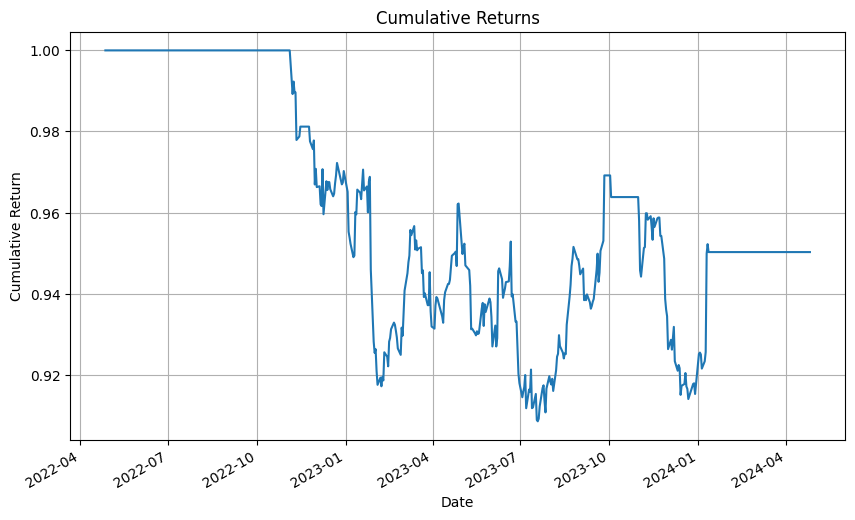

In [28]:
# Calculate the spread (difference) between the two stocks' prices
spread_TSCO_SBRY_p = prices_TSCO_SBRY[stock_TSCO] - prices_TSCO_SBRY[stock_SBRY]

# # Calculate the normalized spread (difference) between the two stocks' prices
# spread_TSCO_SBRY = prices_TSCO_SBRY[stock_TSCO] - prices_TSCO_SBRY[stock_SBRY]

# Define entry and exit thresholds (mean and standard deviation)
entry_threshold = spread_TSCO_SBRY_p.mean()
exit_threshold = 0

# Simulate trading
positions = []
for i in range(len(spread_TSCO_SBRY_p)):
    if spread_TSCO_SBRY_p.iloc[i] < entry_threshold:
        positions.append(1)  # Buy stock1, sell stock2
    elif spread_TSCO_SBRY_p.iloc[i] > exit_threshold:
        positions.append(0)  # Exit position
    else:
        positions.append(None)  # Hold position


# Calculate daily returns
daily_returns = spread_TSCO_SBRY_p.diff() * positions / (prices_TSCO_SBRY[stock_TSCO] + prices_TSCO_SBRY[stock_SBRY])

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

Other metrics

A strategy with a high Sharpe ratio, high win rate, and low maximum drawdown would generally be considered favorable, as it demonstrates strong risk-adjusted returns, consistent profitability, and resilience to market downturns. Conversely, a strategy with a low Sharpe ratio, low win rate, and high maximum drawdown may indicate poor performance and higher risk

In [29]:
# Assume a risk-free rate of 0 for simplicity
risk_free_rate = 0

# Calculate annualized return and volatility
annualized_return = daily_returns.mean() * 252
annualized_volatility = daily_returns.std() * np.sqrt(252)

# Calculate Sharpe ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Calculate win rate
win_rate = (daily_returns > 0).mean()

# Calculate maximum drawdown
cumulative_returns = (1 + daily_returns).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()

print("Sharpe Ratio:", round(sharpe_ratio, 2))
print("Win Rate:", round(win_rate * 100, 2), "%")
print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

Sharpe Ratio: -0.38
Win Rate: 26.93 %
Maximum Drawdown: -9.15 %


In [30]:
# Define a function to calculate profit/loss
def calculate_profit_loss(positions, prices):
    profit_loss = 0
    entry_prices = {stock: None for stock in prices.columns}
    for i in range(len(positions)):
        for stock in prices.columns:
            if positions[i] == 1:  # Buy signal
                entry_prices[stock] = prices.iloc[i][stock]
            elif positions[i] == 0 and entry_prices[stock] is not None:  # Sell signal
                exit_price = prices.iloc[i][stock]
                profit_loss += (exit_price - entry_prices[stock])
                entry_prices[stock] = None
    return profit_loss

# Convert positions to a pandas Series with a DatetimeIndex
positions = pd.Series(positions, index=prices_TSCO_SBRY.index)

# Define the periods in months
periods = [1, 3, 6, 12, 18, 24]

# Get the last date in the data
last_date = prices_TSCO_SBRY.index[-1]

for per in periods:
    # Calculate the start date for the period
    start_d = last_date - pd.DateOffset(months=per)
    
    # Filter the positions and prices data for the period
    positions_period = positions[(positions.index >= start_d) & (positions.index <= last_date)]
    prices_period = prices_TSCO_SBRY[(prices_TSCO_SBRY.index >= start_d) & (prices_TSCO_SBRY.index <= last_date)]
    
    # Calculate the profit/loss for the period
    profit_loss = calculate_profit_loss(positions_period, prices_period[["TSCO.L", "SBRY.L"]])

    if per == 1:
        print(f"Total Profit/Loss for last {per} month: $", round(profit_loss, 2))
    else:
        print(f"Total Profit/Loss for last {per} months: $", round(profit_loss, 2))

Total Profit/Loss for last 1 month: $ 0
Total Profit/Loss for last 3 months: $ 0
Total Profit/Loss for last 6 months: $ 16.9
Total Profit/Loss for last 12 months: $ 19.8
Total Profit/Loss for last 18 months: $ 7.2
Total Profit/Loss for last 24 months: $ 7.2


### EDP | GALP

In [31]:
# Fetch historical data from Yahoo Finance
stock_EDP = 'EDP.LS'
stock_GALP = 'GALP.LS'

data_EDP = yf.download(stock_EDP, period=period, interval=interval)['Close']
data_GALP = yf.download(stock_GALP, period=period, interval=interval)['Close']

# Combine the data into a single DataFrame
prices_EDP_GALP = pd.DataFrame({stock_EDP: data_EDP, stock_GALP: data_GALP})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Cointegration

In [32]:
# Define assets and download data
asset_EDP = 'EDP.LS'
asset_GALP = 'GALP.LS'

tickers_EDP_GALP = [asset_EDP, asset_GALP]

assets_EDP_GALP = pd.DataFrame()

for i in tickers_EDP_GALP:

  df = yf.download(i, period=period, interval=interval)['Close']
  df.rename(i, inplace=True)
  assets_EDP_GALP = pd.concat([assets_EDP_GALP,df], axis=1)
  assets_EDP_GALP.index.name='Date'

assets_EDP_GALP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,EDP.LS,GALP.LS
Date,,
2022-04-26 00:00:00,4.452,10.735000
2022-04-27 00:00:00,4.450,10.965000
2022-04-28 00:00:00,4.481,11.150000
2022-04-29 00:00:00,4.442,11.630000
2022-05-02 00:00:00,4.351,11.300000
...,...,...
2024-04-22 00:00:00,3.578,19.350000
2024-04-23 00:00:00,3.571,20.059999
2024-04-24 00:00:00,3.525,19.990000


In [33]:
# Plot prices in line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=assets_EDP_GALP.index, y=assets_EDP_GALP[asset_EDP], name=asset_EDP))
fig.add_trace(go.Scatter(x=assets_EDP_GALP.index, y=assets_EDP_GALP[asset_GALP], name=asset_GALP))
fig.update_layout(title_text='Prices (USD)', template='simple_white')
fig.show()

In [34]:
# # Plot prices in scatter chart
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=assets_EDP_GALP[asset_EDP], y=assets_EDP_GALP[asset_GALP], mode='markers'))
# fig.update_layout(title_text='EDP Prices x GALP Prices', template='simple_white')
# fig.show()

In [35]:
# Plot returns in scatter chart
returns = assets_EDP_GALP.pct_change()

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=returns[asset_EDP], y=returns[asset_GALP], mode='markers'))
# fig.update_layout(title_text='Retornos', template='simple_white')
# fig.show()

In [36]:
# TESTING COINTEGRATION

# Run augmented engle granger test and print p-value
assets_EDP_GALP.dropna(inplace=True)
score, pvalue, _ = coint(assets_EDP_GALP[asset_EDP], assets_EDP_GALP[asset_GALP])
if pvalue < 0.05:
    print("Cointegration - Augmented Engle-Granger test p-value:", round(pvalue, 4))
else:
    print("No cointegration - Augmented Engle-Granger test p-value:", round(pvalue, 4))

No cointegration - Augmented Engle-Granger test p-value: 0.0766


This test result is that there is a ~6% chance that the series are not cointegrated

In [37]:
# Run linear regression and calculate regression beta

X1_EDP = assets_EDP_GALP[asset_EDP]
X2_GALP = assets_EDP_GALP[asset_GALP]

X1_EDP = sm.add_constant(X1_EDP)
regression_EDP_GALP = sm.OLS(X2_GALP, X1_EDP).fit()
X1_EDP = X1_EDP[asset_EDP]
beta_2 = regression_EDP_GALP.params[asset_EDP]

regression_EDP_GALP.params

const     26.966192
EDP.LS    -3.336372
dtype: float64

In [38]:
assets_figure = assets_EDP_GALP.copy()
assets_figure['regression'] = regression_EDP_GALP.params[0] + regression_EDP_GALP.params[1]*assets_figure[asset_EDP]
assets_figure

,EDP.LS,GALP.LS,regression
Date,,,
2022-04-26 00:00:00,4.452,10.735000,12.112663
2022-04-27 00:00:00,4.450,10.965000,12.119337
2022-04-28 00:00:00,4.481,11.150000,12.015909
2022-04-29 00:00:00,4.442,11.630000,12.146028
2022-05-02 00:00:00,4.351,11.300000,12.449638
...,...,...,...
2024-04-22 00:00:00,3.578,19.350000,15.028653
2024-04-23 00:00:00,3.571,20.059999,15.052007
2024-04-24 00:00:00,3.525,19.990000,15.205480


In [39]:
# # Plot prices with regression line
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=assets_figure[asset_EDP], y=assets_figure[asset_GALP], mode='markers', name='EDP x GALP'))
# fig.add_trace(go.Scatter(x=assets_figure[asset_EDP], y=assets_figure['regression'], mode='lines', name='Regression'))
# fig.update_layout(title_text='EDP Prices x GALP Prices (USD)', template='simple_white')
# fig.show()

In [40]:
# Calculate regression residual
spread_EDP_GALP = X2_GALP - (beta_2 * X1_EDP)

# Plot residuals in line chart as a time series
fig = go.Figure()
fig.add_trace(go.Scatter(x=spread_EDP_GALP.index, y=spread_EDP_GALP, name='Spread'))
fig.update_layout(title_text='Spread', template='simple_white')
fig.show()

In [41]:
# Run augmented dickey fuller test and print p-value
test = adfuller(spread_EDP_GALP)
if test[1] < 0.05:
    print("Spread Stationary - Augmented Dickey-Fuller Test p-value:", round(test[1], 4))
else:
    print("Spread Non-Stationary - Augmented Dickey-Fuller Test p-value:", round(test[1], 4))

Spread Non-Stationary - Augmented Dickey-Fuller Test p-value: 0.1921


The 0.086 p-value do not fall within our confidence level of 5%. This doens't allows us to reject the null-hypothesis and consider the residuals time series stationary.

So, the residuals time series is not stationary.

In [42]:
# Calculate z-score of residuals and plot in line chart
z_score_EDP_GALP = (spread_EDP_GALP - spread_EDP_GALP.mean())/np.std(spread_EDP_GALP)

fig = go.Figure()
fig.add_trace(go.Scatter(x=z_score_EDP_GALP.index, y=z_score_EDP_GALP, name='Z_Score'))
fig.update_layout(title_text='Spread Z-Score', template='simple_white')
fig.show()

In [43]:
assets_EDP_GALP[asset_EDP]

Date
2022-04-26    4.452
2022-04-27    4.450
2022-04-28    4.481
2022-04-29    4.442
2022-05-02    4.351
              ...  
2024-04-22    3.578
2024-04-23    3.571
2024-04-24    3.525
2024-04-25    3.494
2024-04-26    3.523
Name: EDP.LS, Length: 515, dtype: float64

In [85]:
# Plot prices with z-scores

new_edp = assets_EDP_GALP[asset_EDP].copy() * beta_2

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=assets_EDP_GALP.index, y=new_edp, name='beta * ' + asset_EDP), row=1, col=1)
fig.add_trace(go.Scatter(x=assets_EDP_GALP.index, y=assets_EDP_GALP[asset_GALP], name=asset_GALP), row=1, col=1)
fig.add_trace(go.Scatter(x=z_score_EDP_GALP.index, y=z_score_EDP_GALP, name='Z_Score'), row=2, col=1)
fig.update_layout(title_text='Análise Z_Score', template='simple_white', height=850, width=1000)
fig.show()

In [45]:
# Download open prices for assets
assets_open_EDP_GALP = pd.DataFrame()

for i in tickers_EDP_GALP:

  df2 = yf.download(i, period=period)['Open']
  df2.rename(i, inplace=True)
  assets_open_EDP_GALP = pd.concat([assets_open_EDP_GALP, df2], axis=1)
  assets_open_EDP_GALP.index.name='Date'

assets_open_EDP_GALP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,EDP.LS,GALP.LS
Date,,
2022-04-26 00:00:00,4.519,10.820000
2022-04-27 00:00:00,4.446,10.865000
2022-04-28 00:00:00,4.466,10.885000
2022-04-29 00:00:00,4.462,11.385000
2022-05-02 00:00:00,4.441,11.505000
...,...,...
2024-04-22 00:00:00,3.627,18.660000
2024-04-23 00:00:00,3.580,19.844999
2024-04-24 00:00:00,3.560,20.250000


In [46]:
# Define Backtest Parameters

cash = 100000
fees = 0.001

percentage_order_1 = 1
percentage_order_2 = 1

upper_open_threshold = 2
lower_open_threshold = -2

upper_close_threshold = 1
lower_close_threshold = -1

In [47]:
# Define the trading strategy

def pairs_trading_strategy(z_scores):
    position = np.zeros_like(z_scores)

    for i in range(len(z_scores)):
        if z_scores[i] > 2:
            position[i] = -1  # Enter short position
        elif z_scores[i] < -2:
            position[i] = 1  # Enter long position
        elif abs(z_scores[i]) < 1:
            position[i] = 0  # Zero position
        else:
            position[i] = position[i-1]

    return position

# Run the strategy
position_EDP_GALP = pairs_trading_strategy(z_score_EDP_GALP.values)

# Create DataFrame for results
result_EDP_GALP = pd.DataFrame({
    'z_scores': z_score_EDP_GALP,
    'position': position_EDP_GALP,
}, index=z_score_EDP_GALP.index)

result_EDP_GALP[asset_EDP] = -result_EDP_GALP['position']
result_EDP_GALP[asset_GALP] = result_EDP_GALP['position']
result_EDP_GALP

,z_scores,position,EDP.LS,GALP.LS
Date,,,,
2022-04-26 00:00:00,-1.096994,0.0,-0.0,0.0
2022-04-27 00:00:00,-0.919166,0.0,-0.0,0.0
2022-04-28 00:00:00,-0.689499,0.0,-0.0,0.0
2022-04-29 00:00:00,-0.410898,0.0,-0.0,0.0
2022-05-02 00:00:00,-0.915424,0.0,-0.0,0.0
...,...,...,...,...
2024-04-22 00:00:00,3.440966,-1.0,1.0,-1.0
2024-04-23 00:00:00,3.987722,-1.0,1.0,-1.0
2024-04-24 00:00:00,3.809777,-1.0,1.0,-1.0


In [48]:
# Plot z-score along with assets positions
fig = go.Figure()
fig.add_trace(go.Scatter(x=result_EDP_GALP.index, y=result_EDP_GALP['z_scores'], name='Z-Score'))
fig.add_trace(go.Scatter(x=result_EDP_GALP.index, y=result_EDP_GALP[asset_EDP], name=f'Position {asset_EDP}'))
fig.add_trace(go.Scatter(x=result_EDP_GALP.index, y=result_EDP_GALP[asset_GALP], name=f'Position {asset_GALP}'))
fig.update_layout(title_text='Backtest Positions', template='simple_white')
fig.show()

In [49]:
#Create trading signals to open and close positions

vbt_short_signal = ((result_EDP_GALP['position'] == -1) & (result_EDP_GALP['position'].shift(1) != -1))
vbt_long_signal = ((result_EDP_GALP['position'] == 1) & (result_EDP_GALP['position'].shift(1) != 1))

vbt_close_short = ((result_EDP_GALP['position'] == 0) & (result_EDP_GALP['position'].shift(1) == -1))
vbt_close_long = ((result_EDP_GALP['position'] == 0) & (result_EDP_GALP['position'].shift(1) == 1))

In [50]:
# Create trades dataframe according to the signals

tickers_column = pd.Index([asset_EDP, asset_GALP], name='tickers')
vbt_t_EDP_GALP = pd.DataFrame(index=assets_EDP_GALP.index, columns=tickers_column)
vbt_t_EDP_GALP[asset_EDP] = np.nan
vbt_t_EDP_GALP[asset_GALP] = np.nan

# Open position trades
vbt_t_EDP_GALP.loc[vbt_short_signal, asset_EDP] = percentage_order_1
vbt_t_EDP_GALP.loc[vbt_long_signal, asset_EDP] = -percentage_order_1
vbt_t_EDP_GALP.loc[vbt_short_signal, asset_GALP] = -percentage_order_2
vbt_t_EDP_GALP.loc[vbt_long_signal, asset_GALP] = percentage_order_2

# Close position trades
vbt_t_EDP_GALP.loc[vbt_close_short, asset_EDP] = 0
vbt_t_EDP_GALP.loc[vbt_close_long, asset_EDP] = 0
vbt_t_EDP_GALP.loc[vbt_close_short, asset_GALP] = 0
vbt_t_EDP_GALP.loc[vbt_close_long, asset_GALP] = 0

# Shift trades by one candle (avoid look-ahead bias)
vbt_t_EDP_GALP = vbt_t_EDP_GALP.vbt.fshift(1)

# Print trades
print(vbt_t_EDP_GALP[~vbt_t_EDP_GALP.isnull().any(axis=1)])

tickers              EDP.LS  GALP.LS
Date                                
2022-10-12 00:00:00    -1.0      1.0
2022-11-08 00:00:00     0.0      0.0
2024-01-08 00:00:00     1.0     -1.0
2024-01-24 00:00:00     0.0      0.0
2024-04-23 00:00:00     1.0     -1.0


In [51]:
# Run backtest
def portfolio_pairs_trading(group_results):

    return vbt.Portfolio.from_orders(
        assets_EDP_GALP,
        size=vbt_t_EDP_GALP,
        price=assets_open_EDP_GALP,
        size_type='targetpercent',
        val_price=assets_EDP_GALP.vbt.fshift(1),
        init_cash=cash,
        fees=fees,
        cash_sharing=True,
        group_by=group_results,
        call_seq='auto',
        freq='d'
    )

vbt_pf_EDP_GALP = portfolio_pairs_trading(group_results=False)

In [52]:
# Plot orders of both assets
vbt_pf_EDP_GALP[0].plot(subplots='orders',
        title=asset_EDP
    ).show()

vbt_pf_EDP_GALP[1].plot(subplots='orders',
        title=asset_GALP
    ).show()

In [53]:
# Run backtest and print overall results
vbt_pf_EDP_GALP = portfolio_pairs_trading(group_results=True)
# vbt_pf.plot(subplots='all', silence_warnings=True).show()

In [54]:
# Show backtest stats
vbt_pf_EDP_GALP.stats()

Start                         2022-04-26 00:00:00
End                           2024-04-26 00:00:00
Period                          515 days 00:00:00
Start Value                              100000.0
End Value                            92442.143911
Total Return [%]                        -7.557856
Benchmark Return [%]                    35.234868
Max Gross Exposure [%]                     8.6266
Total Fees Paid                       1016.088538
Max Drawdown [%]                        13.123628
Max Drawdown Duration           298 days 00:00:00
Total Trades                                    6
Total Closed Trades                             4
Total Open Trades                               2
Open Trade PnL                       -5263.831288
Win Rate [%]                                 25.0
Best Trade [%]                           7.801697
Worst Trade [%]                         -5.904778
Avg Winning Trade [%]                    7.801697
Avg Losing Trade [%]                    -3.278441


Cumulative returns - ? which stock minus the other for spread?

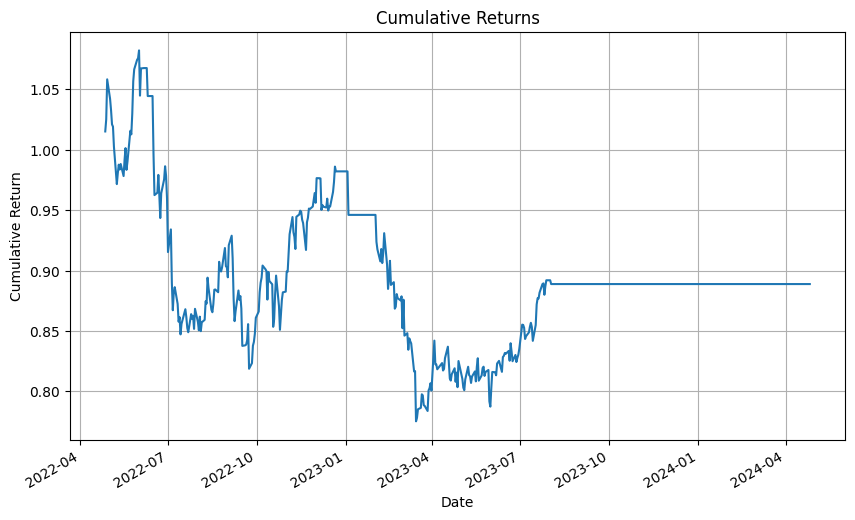

In [55]:
# Calculate the spread (difference) between the two stocks' prices
spread_EDP_GALP_p = prices_EDP_GALP[stock_GALP] - prices_EDP_GALP[stock_EDP]

# Define entry and exit thresholds (mean and standard deviation)
entry_threshold = spread_EDP_GALP_p.mean()
exit_threshold = 0

# Simulate trading
positions = []
for i in range(len(spread_EDP_GALP_p)):
    if spread_EDP_GALP_p.iloc[i] < entry_threshold:
        positions.append(1)  # Buy stock1, sell stock2
    elif spread_EDP_GALP_p.iloc[i] > exit_threshold:
        positions.append(0)  # Exit position
    else:
        positions.append(None)  # Hold position


# Calculate daily returns
daily_returns = spread_EDP_GALP_p.diff() * positions / (prices_EDP_GALP[stock_EDP] + prices_EDP_GALP[stock_GALP])

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

Other metrics

A strategy with a high Sharpe ratio, high win rate, and low maximum drawdown would generally be considered favorable, as it demonstrates strong risk-adjusted returns, consistent profitability, and resilience to market downturns. Conversely, a strategy with a low Sharpe ratio, low win rate, and high maximum drawdown may indicate poor performance and higher risk

In [56]:
# Assume a risk-free rate of 0 for simplicity
risk_free_rate = 0

# Calculate annualized return and volatility
annualized_return = daily_returns.mean() * 252
annualized_volatility = daily_returns.std() * np.sqrt(252)

# Calculate Sharpe ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Calculate win rate
win_rate = (daily_returns > 0).mean()

# Calculate maximum drawdown
cumulative_returns = (1 + daily_returns).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()

print("Sharpe Ratio:", round(sharpe_ratio, 2))
print("Win Rate:", round(win_rate * 100, 2), "%")
print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

Sharpe Ratio: -0.22
Win Rate: 30.87 %
Maximum Drawdown: -28.35 %


In [57]:
# Define a function to calculate profit/loss
def calculate_profit_loss(positions, prices):
    profit_loss = 0
    entry_prices = {stock: None for stock in prices.columns}
    for i in range(len(positions)):
        for stock in prices.columns:
            if positions[i] == 1:  # Buy signal
                entry_prices[stock] = prices.iloc[i][stock]
            elif positions[i] == 0 and entry_prices[stock] is not None:  # Sell signal
                exit_price = prices.iloc[i][stock]
                profit_loss += (exit_price - entry_prices[stock])
                entry_prices[stock] = None
    return profit_loss

# Convert positions to a pandas Series with a DatetimeIndex
positions = pd.Series(positions, index=prices_EDP_GALP.index)

# Define the periods in months
periods = [1, 3, 6, 12, 18, 24]

# Get the last date in the data
last_date = prices_EDP_GALP.index[-1]

for per in periods:
    # Calculate the start date for the period
    start_d = last_date - pd.DateOffset(months=per)
    
    # Filter the positions and prices data for the period
    positions_period = positions[(positions.index >= start_d) & (positions.index <= last_date)]
    prices_period = prices_EDP_GALP[(prices_EDP_GALP.index >= start_d) & (prices_EDP_GALP.index <= last_date)]
    
    # Calculate the profit/loss for the period
    profit_loss = calculate_profit_loss(positions_period, prices_period[["EDP.LS", "GALP.LS"]])

    if per == 1:
        print(f"Total Profit/Loss for last {per} month: $", round(profit_loss, 2))
    else:
        print(f"Total Profit/Loss for last {per} months: $", round(profit_loss, 2))

Total Profit/Loss for last 1 month: $ 0
Total Profit/Loss for last 3 months: $ 0
Total Profit/Loss for last 6 months: $ 0
Total Profit/Loss for last 12 months: $ 0.6
Total Profit/Loss for last 18 months: $ 1.07
Total Profit/Loss for last 24 months: $ 1.4


### NVIDIA | AMD

In [58]:
# Fetch historical data from Yahoo Finance
stock_NVDA = 'NVDA'
stock_AMD = 'AMD'

data_NVDA = yf.download(stock_NVDA, period=period, interval=interval)['Close']
data_AMD = yf.download(stock_AMD, period=period, interval=interval)['Close']

# Combine the data into a single DataFrame
prices_NVDA_AMD = pd.DataFrame({stock_NVDA: data_NVDA, stock_AMD: data_AMD})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Cointegration

In [59]:
# Define assets and download data
asset_NVDA = 'NVDA'
asset_AMD = 'AMD'

tickers_NVDA_AMD = [asset_NVDA, asset_AMD]

assets_NVDA_AMD = pd.DataFrame()

for i in tickers_NVDA_AMD:

  df = yf.download(i, period=period, interval=interval)['Close']
  df.rename(i, inplace=True)
  assets_NVDA_AMD = pd.concat([assets_NVDA_AMD,df], axis=1)
  assets_NVDA_AMD.index.name='Date'

assets_NVDA_AMD

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,NVDA,AMD
Date,,
2022-04-27 00:00:00,184.149994,84.910004
2022-04-28 00:00:00,197.820007,89.639999
2022-04-29 00:00:00,185.470001,85.519997
2022-05-02 00:00:00,195.330002,89.839996
2022-05-03 00:00:00,196.020004,91.129997
...,...,...
2024-04-22 00:00:00,795.179993,148.639999
2024-04-23 00:00:00,824.229980,152.270004
2024-04-24 00:00:00,796.770020,151.740005


In [60]:
# Plot prices in line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=assets_NVDA_AMD.index, y=assets_NVDA_AMD[asset_NVDA], name=asset_NVDA))
fig.add_trace(go.Scatter(x=assets_NVDA_AMD.index, y=assets_NVDA_AMD[asset_AMD], name=asset_AMD))
fig.update_layout(title_text='Prices (USD)', template='simple_white')
fig.show()

In [61]:
# # Plot prices in scatter chart
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=assets_NVDA_AMD[asset_NVDA], y=assets_NVDA_AMD[asset_AMD], mode='markers'))
# fig.update_layout(title_text='NVDA Prices x AMD Prices', template='simple_white')
# fig.show()

In [62]:
# Plot returns in scatter chart
returns = assets_NVDA_AMD.pct_change()

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=returns[asset_NVDA], y=returns[asset_AMD], mode='markers'))
# fig.update_layout(title_text='Retornos', template='simple_white')
# fig.show()

In [63]:
# TESTING COINTEGRATION

# Run augmented engle granger test and print p-value
assets_NVDA_AMD.dropna(inplace=True)
score, pvalue, _ = coint(assets_NVDA_AMD[asset_NVDA], assets_NVDA_AMD[asset_AMD])
if pvalue < 0.05:
    print("Cointegration - Augmented Engle-Granger test p-value:", round(pvalue, 4))
else:
    print("No Cointegration - Augmented Engle-Granger test p-value:", round(pvalue, 4))

No Cointegration - Augmented Engle-Granger test p-value: 0.776


This test result is that there is a 70% chance that the series are not cointegrated

In [64]:
# Run linear regression and calculate regression beta

X1_NVDA = assets_NVDA_AMD[asset_NVDA]
X2_AMD = assets_NVDA_AMD[asset_AMD]

X1_NVDA = sm.add_constant(X1_NVDA)
regression_NVDA_AMD = sm.OLS(X2_AMD, X1_NVDA).fit()
X1_NVDA = X1_NVDA[asset_NVDA]
beta_3 = regression_NVDA_AMD.params[asset_NVDA]

regression_NVDA_AMD.params

const    53.379522
NVDA      0.147738
dtype: float64

In [65]:
assets_figure = assets_NVDA_AMD.copy()
assets_figure['regression'] = regression_NVDA_AMD.params[0] + regression_NVDA_AMD.params[1]*assets_figure[asset_NVDA]
assets_figure

,NVDA,AMD,regression
Date,,,
2022-04-27 00:00:00,184.149994,84.910004,80.585385
2022-04-28 00:00:00,197.820007,89.639999,82.604958
2022-04-29 00:00:00,185.470001,85.519997,80.780399
2022-05-02 00:00:00,195.330002,89.839996,82.237091
2022-05-03 00:00:00,196.020004,91.129997,82.339030
...,...,...,...
2024-04-22 00:00:00,795.179993,148.639999,170.857438
2024-04-23 00:00:00,824.229980,152.270004,175.149211
2024-04-24 00:00:00,796.770020,151.740005,171.092345


In [66]:
# # Plot prices with regression line
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=assets_figure[asset_NVDA], y=assets_figure[asset_AMD], mode='markers', name='NVDA x AMD'))
# fig.add_trace(go.Scatter(x=assets_figure[asset_NVDA], y=assets_figure['regression'], mode='lines', name='Regression'))
# fig.update_layout(title_text='NVDA Prices x AMD Prices (USD)', template='simple_white')
# fig.show()

In [67]:
# Calculate regression residual
spread_NVDA_AMD = X2_AMD - (beta_3 * X1_NVDA)

# Plot residuals in line chart as a time series
fig = go.Figure()
fig.add_trace(go.Scatter(x=spread_NVDA_AMD.index, y=spread_NVDA_AMD, name='Spread'))
fig.update_layout(title_text='Spread', template='simple_white')
fig.show()

In [68]:
# Run augmented dickey fuller test and print p-value
test = adfuller(spread_NVDA_AMD)
if test[1] < 0.05:
    print("Spread Stationary - Augmented Dickey-Fuller Test p-value:", round(test[1], 4))
else:
    print("Spread Non-Stationary - Augmented Dickey-Fuller Test p-value:", round(test[1], 4))

Spread Non-Stationary - Augmented Dickey-Fuller Test p-value: 0.2723


The 0.20 p-value do not fall within our confidence level of 5%. This doens't allows us to reject the null-hypothesis and consider the residuals time series stationary.

So, the residuals time series is not stationary.

In [69]:
# Calculate z-score of residuals and plot in line chart
z_score_NVDA_AMD = (spread_NVDA_AMD - spread_NVDA_AMD.mean())/np.std(spread_NVDA_AMD)

fig = go.Figure()
fig.add_trace(go.Scatter(x=z_score_NVDA_AMD.index, y=z_score_NVDA_AMD, name='Z_Score'))
fig.update_layout(title_text='Spread Z-Score', template='simple_white')
fig.show()

In [86]:
# Plot prices with z-scores

new_nvda = assets_NVDA_AMD[asset_NVDA].copy() * beta_3

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=assets_NVDA_AMD.index, y=new_nvda, name='beta * ' + asset_NVDA), row=1, col=1)
fig.add_trace(go.Scatter(x=assets_NVDA_AMD.index, y=assets_NVDA_AMD[asset_AMD], name=asset_AMD), row=1, col=1)
fig.add_trace(go.Scatter(x=z_score_NVDA_AMD.index, y=z_score_NVDA_AMD, name='Z_Score'), row=2, col=1)
fig.update_layout(title_text='Análise Z_Score', template='simple_white', height=850, width=1000)
fig.show()

In [71]:
# Download open prices for assets
assets_open_NVDA_AMD = pd.DataFrame()

for i in tickers_NVDA_AMD:

  df2 = yf.download(i, period=period)['Open']
  df2.rename(i, inplace=True)
  assets_open_NVDA_AMD = pd.concat([assets_open_NVDA_AMD, df2], axis=1)
  assets_open_NVDA_AMD.index.name='Date'

assets_open_NVDA_AMD

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,NVDA,AMD
Date,,
2022-04-27 00:00:00,185.979996,84.250000
2022-04-28 00:00:00,189.669998,86.669998
2022-04-29 00:00:00,194.020004,88.050003
2022-05-02 00:00:00,185.410004,85.660004
2022-05-03 00:00:00,194.000000,89.849998
...,...,...
2024-04-22 00:00:00,781.039978,148.149994
2024-04-23 00:00:00,807.690002,151.649994
2024-04-24 00:00:00,839.500000,156.559998


In [72]:
#Define Backtest Parameters

cash = 100000
fees = 0.001

percentage_order_1 = 1
percentage_order_2 = 1

upper_open_threshold = 2
lower_open_threshold = -2

upper_close_threshold = 1
lower_close_threshold = -1

In [73]:
# Define the trading strategy

def pairs_trading_strategy(z_scores):
    position = np.zeros_like(z_scores)

    for i in range(len(z_scores)):
        if z_scores[i] > 2:
            position[i] = -1  # Enter short position
        elif z_scores[i] < -2:
            position[i] = 1  # Enter long position
        elif abs(z_scores[i]) < 1:
            position[i] = 0  # Zero position # close the position when the z-score goes to zero
        else:
            position[i] = position[i-1]

    return position

# Run the strategy
position_NVDA_AMD = pairs_trading_strategy(z_score_NVDA_AMD.values)

# Create DataFrame for results
result_NVDA_AMD = pd.DataFrame({
    'z_scores': z_score_NVDA_AMD,
    'position': position_NVDA_AMD,
}, index=z_score_NVDA_AMD.index)

result_NVDA_AMD[asset_NVDA] = -result_NVDA_AMD['position']
result_NVDA_AMD[asset_AMD] = result_NVDA_AMD['position']
result_NVDA_AMD

,z_scores,position,NVDA,AMD
Date,,,,
2022-04-27 00:00:00,0.348485,0.0,-0.0,0.0
2022-04-28 00:00:00,0.566895,0.0,-0.0,0.0
2022-04-29 00:00:00,0.381925,0.0,-0.0,0.0
2022-05-02 00:00:00,0.612655,0.0,-0.0,0.0
2022-05-03 00:00:00,0.708391,0.0,-0.0,0.0
...,...,...,...,...
2024-04-22 00:00:00,-1.790319,0.0,-0.0,0.0
2024-04-23 00:00:00,-1.843645,0.0,-0.0,0.0
2024-04-24 00:00:00,-1.559444,0.0,-0.0,0.0


In [74]:
# Plot z-score along with assets positions
fig = go.Figure()
fig.add_trace(go.Scatter(x=result_NVDA_AMD.index, y=result_NVDA_AMD['z_scores'], name='Z-Score'))
fig.add_trace(go.Scatter(x=result_NVDA_AMD.index, y=result_NVDA_AMD[asset_NVDA], name=f'Position {asset_NVDA}'))
fig.add_trace(go.Scatter(x=result_NVDA_AMD.index, y=result_NVDA_AMD[asset_AMD], name=f'Position {asset_AMD}'))
fig.update_layout(title_text='Backtest Positions', template='simple_white')
fig.show()

In [75]:
#Create trading signals to open and close positions

vbt_short_signal = ((result_NVDA_AMD['position'] == -1) & (result_NVDA_AMD['position'].shift(1) != -1))
vbt_long_signal = ((result_NVDA_AMD['position'] == 1) & (result_NVDA_AMD['position'].shift(1) != 1))

vbt_close_short = ((result_NVDA_AMD['position'] == 0) & (result_NVDA_AMD['position'].shift(1) == -1))
vbt_close_long = ((result_NVDA_AMD['position'] == 0) & (result_NVDA_AMD['position'].shift(1) == 1))

In [76]:
# Create trades dataframe according to the signals

tickers_column = pd.Index([asset_NVDA, asset_AMD], name='tickers')
vbt_t_NVDA_AMD = pd.DataFrame(index=assets_NVDA_AMD.index, columns=tickers_column)
vbt_t_NVDA_AMD[asset_NVDA] = np.nan
vbt_t_NVDA_AMD[asset_AMD] = np.nan

# Open position trades
vbt_t_NVDA_AMD.loc[vbt_short_signal, asset_NVDA] = percentage_order_1
vbt_t_NVDA_AMD.loc[vbt_long_signal, asset_NVDA] = -percentage_order_1
vbt_t_NVDA_AMD.loc[vbt_short_signal, asset_AMD] = -percentage_order_2
vbt_t_NVDA_AMD.loc[vbt_long_signal, asset_AMD] = percentage_order_2

# Close position trades
vbt_t_NVDA_AMD.loc[vbt_close_short, asset_NVDA] = 0
vbt_t_NVDA_AMD.loc[vbt_close_long, asset_NVDA] = 0
vbt_t_NVDA_AMD.loc[vbt_close_short, asset_AMD] = 0
vbt_t_NVDA_AMD.loc[vbt_close_long, asset_AMD] = 0

# Shift trades by one candle (avoid look-ahead bias)
vbt_t_NVDA_AMD = vbt_t_NVDA_AMD.vbt.fshift(1)

# Print trades
print(vbt_t_NVDA_AMD[~vbt_t_NVDA_AMD.isnull().any(axis=1)])

tickers              NVDA  AMD
Date                          
2022-06-03 00:00:00   1.0 -1.0
2022-06-14 00:00:00   0.0  0.0
2024-01-19 00:00:00   1.0 -1.0
2024-02-13 00:00:00   0.0  0.0
2024-03-04 00:00:00   1.0 -1.0
2024-03-14 00:00:00   0.0  0.0


In [77]:
# Run backtest
def portfolio_pairs_trading(group_results):

    return vbt.Portfolio.from_orders(
        assets_NVDA_AMD,
        size=vbt_t_NVDA_AMD,
        price=assets_open_NVDA_AMD,
        size_type='targetpercent',
        val_price=assets_NVDA_AMD.vbt.fshift(1),
        init_cash=cash,
        fees=fees,
        cash_sharing=True,
        group_by=group_results,
        call_seq='auto',
        freq='d'
    )

vbt_pf_NVDA_AMD = portfolio_pairs_trading(group_results=False)

In [78]:
# Plot orders of both assets
vbt_pf_NVDA_AMD[0].plot(subplots='orders',
        title=asset_NVDA
    ).show()

vbt_pf_NVDA_AMD[1].plot(subplots='orders',
        title=asset_AMD
    ).show()

In [79]:
# Run backtest and print overall results
vbt_pf_NVDA_AMD = portfolio_pairs_trading(group_results=True)
# vbt_pf.plot(subplots='all', silence_warnings=True).show()

In [80]:
# Show backtest stats
vbt_pf_NVDA_AMD.stats()

Start                         2022-04-27 00:00:00
End                           2024-04-26 00:00:00
Period                          503 days 00:00:00
Start Value                              100000.0
End Value                           133983.094375
Total Return [%]                        33.983094
Benchmark Return [%]                   230.902496
Max Gross Exposure [%]                   2.774884
Total Fees Paid                       1269.811612
Max Drawdown [%]                         4.421601
Max Drawdown Duration           411 days 00:00:00
Total Trades                                    6
Total Closed Trades                             6
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            66.666667
Best Trade [%]                           21.18093
Worst Trade [%]                        -17.743496
Avg Winning Trade [%]                    12.60506
Avg Losing Trade [%]                    -9.617749


Cumulative returns

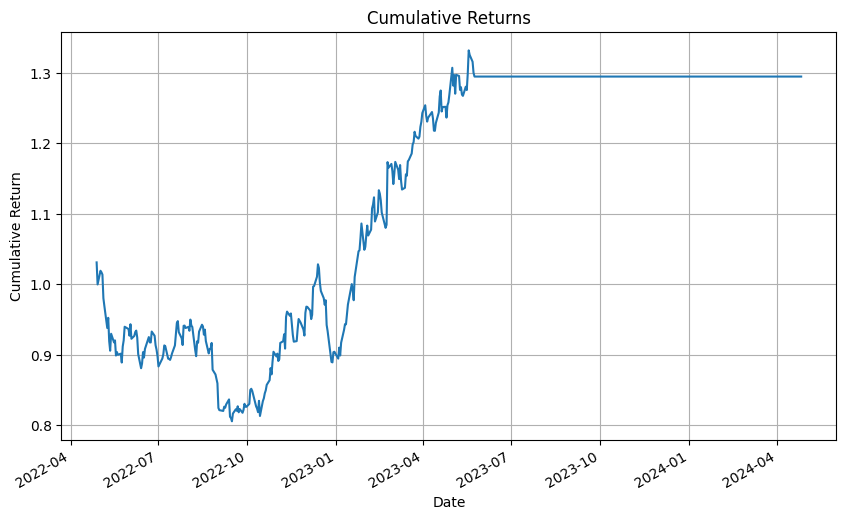

In [81]:
# Calculate the spread (difference) between the two stocks' prices
spread_NVDA_AMD_p = prices_NVDA_AMD[stock_NVDA] - prices_NVDA_AMD[stock_AMD]

# Define entry and exit thresholds (mean and standard deviation)
entry_threshold = spread_NVDA_AMD_p.mean()
exit_threshold = 0

# Simulate trading
positions = []
for i in range(len(spread_NVDA_AMD_p)):
    if spread_NVDA_AMD_p.iloc[i] < entry_threshold:
        positions.append(1)  # Buy stock1, sell stock2
    elif spread_NVDA_AMD_p.iloc[i] > exit_threshold:
        positions.append(0)  # Exit position
    else:
        positions.append(None)  # Hold position

# Calculate daily returns
daily_returns = spread_NVDA_AMD_p.diff() * positions / (prices_NVDA_AMD[stock_NVDA] + prices_NVDA_AMD[stock_AMD])

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

In [82]:
# Define a function to calculate profit/loss
def calculate_profit_loss(positions, prices):
    profit_loss = 0
    entry_prices = {stock: None for stock in prices.columns}
    for i in range(len(positions)):
        for stock in prices.columns:
            if positions[i] == 1:  # Buy signal
                entry_prices[stock] = prices.iloc[i][stock]
            elif positions[i] == 0 and entry_prices[stock] is not None:  # Sell signal
                exit_price = prices.iloc[i][stock]
                profit_loss += (exit_price - entry_prices[stock])
                entry_prices[stock] = None
    return profit_loss

# Convert positions to a pandas Series with a DatetimeIndex
positions = pd.Series(positions, index=prices_NVDA_AMD.index)

# Define the periods in months
periods = [1, 3, 6, 12, 18, 24]

# Get the last date in the data
last_date = prices_NVDA_AMD.index[-1]

for per in periods:
    # Calculate the start date for the period
    start_d = last_date - pd.DateOffset(months=per)
    
    # Filter the positions and prices data for the period
    positions_period = positions[(positions.index >= start_d) & (positions.index <= last_date)]
    prices_period = prices_NVDA_AMD[(prices_NVDA_AMD.index >= start_d) & (prices_NVDA_AMD.index <= last_date)]
    
    # Calculate the profit/loss for the period
    profit_loss = calculate_profit_loss(positions_period, prices_period[["NVDA", "AMD"]])

    if per == 1:
        print(f"Total Profit/Loss for last {per} month: $", round(profit_loss, 2))
    else:
        print(f"Total Profit/Loss for last {per} months: $", round(profit_loss, 2))

Total Profit/Loss for last 1 month: $ 0
Total Profit/Loss for last 3 months: $ 0
Total Profit/Loss for last 6 months: $ 0
Total Profit/Loss for last 12 months: $ 86.5
Total Profit/Loss for last 18 months: $ 86.5
Total Profit/Loss for last 24 months: $ 86.5
